In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

import math
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

file = r'downloads/Unemployment.xls'
df= pd.read_excel(file, header=None)
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,Unemployment and median household income for t...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Sources: Unemployment - Bureau of Labor Statis...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Median Household Income - Census Bureau - SAIP...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"For definitions of rural classifications, see ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,"This table was prepared by USDA, Economic Rese...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,FIPStxt,State,Area_name,Rural_urban_continuum_code_2013,Urban_influence_code_2013,Metro_2013,Civilian_labor_force_2007,Employed_2007,Unemployed_2007,Unemployment_rate_2007,...,Civilian_labor_force_2016,Employed_2016,Unemployed_2016,Unemployment_rate_2016,Civilian_labor_force_2017,Employed_2017,Unemployed_2017,Unemployment_rate_2017,Median_Household_Income_2016,Med_HH_Income_Percent_of_State_Total_2016
8,00000,US,United States,NaN,NaN,NaN,152191093,145156134,7034959,4.62245,...,158921892,151183680,7738212,4.86919,160588515,153594100,6994415,4.35549,57617,NaN
9,01000,AL,Alabama,NaN,NaN,NaN,2175612,2089127,86485,4,...,2173175,2045624,127551,5.9,2168444,2073106,95338,4.4,46309,100


In [2]:
#We need to clean the excel file for obvious visual defects

df.columns=df.iloc[7] #This renames the columns of the data frame
df=df.iloc[8:] #This deletes the data of rows with extraneous information
df=df.reset_index(drop=True) #This resets index without adding an additional column
df.head() # We can now explore the data to find additional items that need to be cleaned
df.shape
df.info()

7,FIPStxt,State,Area_name,Rural_urban_continuum_code_2013,Urban_influence_code_2013,Metro_2013,Civilian_labor_force_2007,Employed_2007,Unemployed_2007,Unemployment_rate_2007,...,Civilian_labor_force_2016,Employed_2016,Unemployed_2016,Unemployment_rate_2016,Civilian_labor_force_2017,Employed_2017,Unemployed_2017,Unemployment_rate_2017,Median_Household_Income_2016,Med_HH_Income_Percent_of_State_Total_2016
0,00000,US,United States,NaN,NaN,NaN,152191093,145156134,7034959,4.62245,...,158921892,151183680,7738212,4.86919,160588515,153594100,6994415,4.35549,57617,NaN
1,01000,AL,Alabama,NaN,NaN,NaN,2175612,2089127,86485,4,...,2173175,2045624,127551,5.9,2168444,2073106,95338,4.4,46309,100
2,01001,AL,"Autauga County, AL",2,2,1,24383,23577,806,3.3,...,25918,24593,1325,5.1,25909,24908,1001,3.9,54487,117.7
3,01003,AL,"Baldwin County, AL",3,2,1,82659,80099,2560,3.1,...,90500,85656,4844,5.4,91567,87915,3652,4,56460,121.9
4,01005,AL,"Barbour County, AL",6,6,0,10334,9684,650,6.3,...,8402,7700,702,8.4,8236,7750,486,5.9,32884,71


(3275, 52)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3275 entries, 0 to 3274
Data columns (total 52 columns):
FIPStxt                                      3275 non-null object
State                                        3275 non-null object
Area_name                                    3275 non-null object
Rural_urban_continuum_code_2013              3219 non-null object
Urban_influence_code_2013                    3219 non-null object
Metro_2013                                   3222 non-null object
Civilian_labor_force_2007                    3270 non-null object
Employed_2007                                3270 non-null object
Unemployed_2007                              3270 non-null object
Unemployment_rate_2007                       3270 non-null object
Civilian_labor_force_2008                    3270 non-null object
Employed_2008                                3270 non-null object
Unemployed_2008                              3270 non-null object
Unemployment_rate_2008             

In [3]:
# Most columns have most data. However, the data is stored as objects when in most columns floats would be more preferable
df=df.apply(pd.to_numeric,errors='ignore')
#Now we look for empty data. 
#The above demonstrates that we have 3275 rows of data but some of our columns have as few as 3192 data points. 
#Thus at most any column is missing as much as three percent of its data. Is this random or are there empty rows?

np.where(pd.isnull(df))
#This returns where the value is NaN (Not a number)

(array([   0,    0,    0,    0,    1,    1,    1,   69,   69,   69,   79,
          79,   79,   79,   79,   79,   79,   79,   79,   79,   79,   79,
          90,   90,   90,   90,   90,   90,   90,   90,   90,   90,   90,
          90,   91,   91,   91,   91,   91,   91,   91,   91,   91,   91,
          91,   91,   92,   92,   92,   92,   92,   92,   92,   92,   92,
          92,   92,   92,   92,   92,   92,   92,   92,   92,   92,   92,
          92,   92,   92,   92,   92,   92,   92,   92,   92,   92,   92,
          92,   92,   92,   92,   92,   94,   94,   94,   94,   94,   94,
          94,   94,   94,   94,   94,   94,   95,   95,   95,   95,   95,
          95,   95,   95,   95,   95,   95,   95,   95,   95,   95,   95,
          95,   95,   95,   95,   95,   95,   95,   95,   95,   95,   95,
          95,   95,   95,   95,   95,   95,   95,   95,   95,   98,   98,
          98,   98,   98,   98,   98,   98,   98,   98,   98,   98,   99,
          99,   99,   99,   99,   99, 

In [4]:
#Columns 50 and 51 are conspicuous in the amount of data they have missing as are rows 90 thru 99
#Columns 50 and 51 refer to income
#Let's find out what is going on with rows 90 thru 99
print(df.iloc[90:100,0:7])

7   FIPStxt State                                        Area_name  \
90     2195    AK                           Petersburg Borough, AK   
91     2198    AK            Prince of Wales-Hyder Census Area, AK   
92     2201    AK  Prince of Wales-Outer Ketchikan Census Area, AK   
93     2220    AK                           Sitka Borough/city, AK   
94     2230    AK                         Skagway Municipality, AK   
95     2232    AK            Skagway-Hoonah-Angoon Census Area, AK   
96     2240    AK              Southeast Fairbanks Census Area, AK   
97     2261    AK                   Valdez-Cordova Census Area, AK   
98     2275    AK                        Wrangell Borough/city, AK   
99     2280    AK              Wrangell-Petersburg Census Area, AK   

7   Rural_urban_continuum_code_2013  Urban_influence_code_2013  Metro_2013  \
90                              9.0                       11.0         0.0   
91                              9.0                       10.0         0.

In [5]:
#It seems like in particular, rows 92, 95, and 99 have their urban / rural codes missing.
#This could become a matter of importance depending on the analysis done. 
#For now, I do not exclude anything from the data set. 
#I suspect some vacancies are the result of statewide data. These rows should be excluded since most of the data is county level data.
print(df.iloc[102,2])


Arizona


In [6]:
#I create a new data frame for US and state level data and remove the data from the data set I am utilizing

dfstate=df[df['Metro_2013'].isnull() & df['Urban_influence_code_2013'].isnull() & df['Rural_urban_continuum_code_2013'].isnull()]
df = df[np.isfinite(df['Metro_2013']) & np.isfinite(df['Rural_urban_continuum_code_2013'])& np.isfinite(df['Urban_influence_code_2013'])]
df.head()
df.shape

7,FIPStxt,State,Area_name,Rural_urban_continuum_code_2013,Urban_influence_code_2013,Metro_2013,Civilian_labor_force_2007,Employed_2007,Unemployed_2007,Unemployment_rate_2007,...,Civilian_labor_force_2016,Employed_2016,Unemployed_2016,Unemployment_rate_2016,Civilian_labor_force_2017,Employed_2017,Unemployed_2017,Unemployment_rate_2017,Median_Household_Income_2016,Med_HH_Income_Percent_of_State_Total_2016
2,1001,AL,"Autauga County, AL",2.0,2.0,1.0,24383.0,23577.0,806.0,3.3,...,25918.0,24593.0,1325.0,5.1,25909.0,24908.0,1001.0,3.9,54487.0,117.7
3,1003,AL,"Baldwin County, AL",3.0,2.0,1.0,82659.0,80099.0,2560.0,3.1,...,90500.0,85656.0,4844.0,5.4,91567.0,87915.0,3652.0,4.0,56460.0,121.9
4,1005,AL,"Barbour County, AL",6.0,6.0,0.0,10334.0,9684.0,650.0,6.3,...,8402.0,7700.0,702.0,8.4,8236.0,7750.0,486.0,5.9,32884.0,71.0
5,1007,AL,"Bibb County, AL",1.0,1.0,1.0,8791.0,8432.0,359.0,4.1,...,8607.0,8050.0,557.0,6.5,8506.0,8133.0,373.0,4.4,43079.0,93.0
6,1009,AL,"Blount County, AL",1.0,1.0,1.0,26629.0,25780.0,849.0,3.2,...,24576.0,23248.0,1328.0,5.4,24494.0,23509.0,985.0,4.0,47213.0,102.0


(3219, 52)

In [7]:
#Now that we have a relatively clean dataset, we can do some analysis
#We begin with data exploration and basic data visualization. We'll use matplotlib for exploratory data analysis
#Later, we'll use bokeh or seaborn for more complex charts to show our findings if we find anything

df['Median_Household_Income_2016'].describe()
dfstate['Median_Household_Income_2016'].describe()
df['Rural_urban_continuum_code_2013'].value_counts()


count      3141.000000
mean      49522.113976
std       12887.309622
min       22045.000000
25%       41072.000000
50%       47589.000000
75%       55308.000000
max      134609.000000
Name: Median_Household_Income_2016, dtype: float64

count       52.000000
mean     58155.769231
std       9670.328852
min      41793.000000
25%      51449.500000
50%      56695.500000
75%      65616.750000
max      78787.000000
Name: Median_Household_Income_2016, dtype: float64

6.0    597
1.0    472
7.0    434
9.0    425
2.0    394
3.0    368
8.0    220
4.0    217
5.0     92
Name: Rural_urban_continuum_code_2013, dtype: int64

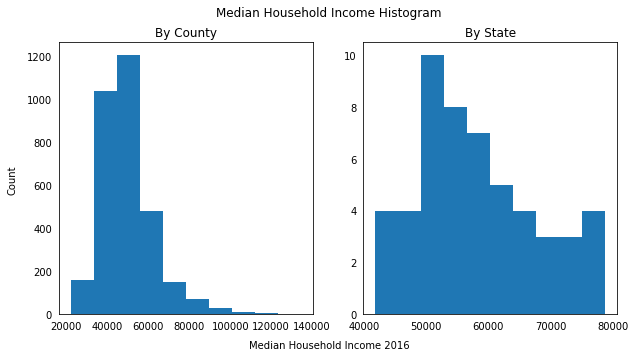

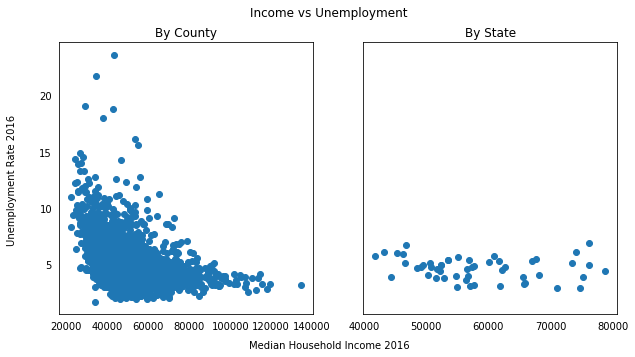

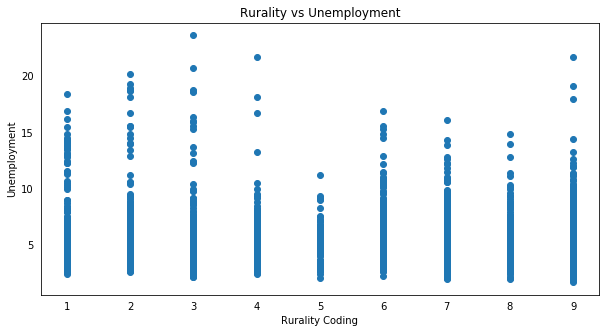

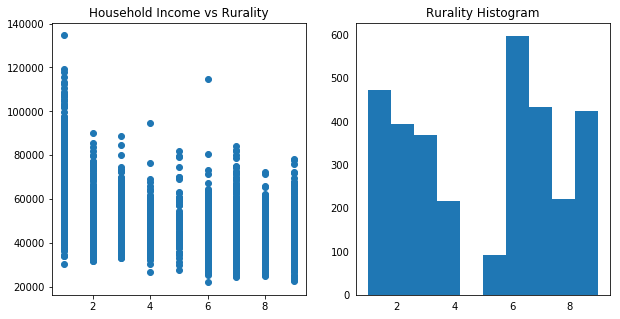

In [8]:
fig, axs = plt.subplots(1, 2,figsize=(10,5),sharey=False)
axs[0].hist(df['Median_Household_Income_2016'])
axs[1].hist(dfstate['Median_Household_Income_2016'])
fig.suptitle("Median Household Income Histogram")
fig.text(0.5, 0.04, 'Median Household Income 2016', ha='center', va='center')
fig.text(0.06, 0.5, 'Count', ha='center', va='center', rotation='vertical')
axs[0].set_title('By County')
axs[1].set_title('By State')
axs[0].tick_params(
    axis='both',          # changes apply to both x-axis and y-axis
    which='both',         # both major and minor ticks are affected
    bottom=False,         # ticks along the bottom edge are off
    top=False,  
    left=False,
    right=False,          # ticks along the top edge are off
    labelbottom=True)     # labels along the bottom edge are off
axs[1].tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=True)
plt.show();


fig, axs = plt.subplots(1, 2,figsize=(10,5),sharey=True)
fig.suptitle("Income vs Unemployment")
axs[0].scatter(df.Median_Household_Income_2016,df.Unemployment_rate_2016)
axs[1].scatter(dfstate.Median_Household_Income_2016,dfstate.Unemployment_rate_2016)
fig.text(0.5, 0.04, 'Median Household Income 2016', ha='center', va='center')
axs[0].set_title('By County')
axs[1].set_title('By State')
fig.text(0.06, 0.5, 'Unemployment Rate 2016', ha='center', va='center', rotation='vertical');
axs[0].tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=True)
axs[1].tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=True)
plt.show();


plt.figure(figsize=(10,5))
plt.scatter(df.Rural_urban_continuum_code_2013,df.Unemployment_rate_2016)
plt.title('Rurality vs Unemployment')
plt.xlabel('Rurality Coding')
plt.ylabel('Unemployment')
plt.tick_params(axis='both',which='both',bottom=False, top=False, left=False, right=False, labelbottom=True)
plt.show();

fig,axs = plt.subplots(1,2,figsize=(10,5),sharey=False)
axs[0].scatter(df.Rural_urban_continuum_code_2013,df.Median_Household_Income_2016)
axs[1].hist(df['Rural_urban_continuum_code_2013'])
axs[0].set_title('Household Income vs Rurality') 
axs[1].set_title('Rurality Histogram')
plt.tick_params(axis='both',which='both',bottom=False, top=False, left=False, right=False, labelbottom=True)
plt.show();

In [9]:
df['Unemployment_rate_2016']=1/(df['Unemployment_rate_2016']) #We transform the data to fit a multi-linear model 

df['Median_Household_Income_2016'].corr(df['Unemployment_rate_2016']) #And see if any of our variables of interest are correlated with each other
df['Rural_urban_continuum_code_2013'].corr(df['Unemployment_rate_2016'])
df['Rural_urban_continuum_code_2013'].corr(df['Median_Household_Income_2016'])


0.41851270770902577

0.09086125604295041

-0.4489512002550166

In [10]:
#We now run a linear regression in order to predict median household income from the uncorrelated predictor variables rural urban continuum code and unemployment rate
#Normally, we would check to make sure that the conditions of a linear regression are met but we bypass this for simplicity and since there is little multicolinearity and there is a linear relationship between the predictors and income

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, accuracy_score

lin = df[np.isfinite(df['Unemployment_rate_2016']) & np.isfinite(df['Median_Household_Income_2016'])]
X = lin.loc[:,['Unemployment_rate_2016','Rural_urban_continuum_code_2013']]
target = lin.loc[:,['Median_Household_Income_2016']]

X_train, X_test, Y_train, Y_test = train_test_split(X,target, test_size=.2, random_state=5)
lm=LinearRegression()
lm.fit(X_train,Y_train)
pred_test = lm.predict(X_test)

print('Linear Regression Results')
print('Coefficients: ', lm.coef_)
print('Intercept:  ', lm.intercept_)
print('Mean Squared Error:  ', mean_squared_error(Y_test, pred_test))
print('Coefficient of Determination: %.2f' % r2_score(Y_test, pred_test));


Linear Regression Results
Coefficients:  [[77457.69323122 -2283.4904937 ]]
Intercept:   [44476.76375613]
Mean Squared Error:   97972940.53611758
Coefficient of Determination: 0.36


In [11]:
from sklearn import tree

#For the Rural_urban_continuum_code_2013, the classification is as follows
#Metropolitan Counties*
    #Code	Description
    #1	Counties in metro areas of 1 million population or more
    #2	Counties in metro areas of 250,000 to 1 million population
    #3	Counties in metro areas of fewer than 250,000 population

#Nonmetropolitan Counties
    #4	Urban population of 20,000 or more, adjacent to a metro area
    #5	Urban population of 20,000 or more, not adjacent to a metro area
    #6	Urban population of 2,500 to 19,999, adjacent to a metro area
    #7	Urban population of 2,500 to 19,999, not adjacent to a metro area
    #8	Completely rural or less than 2,500 urban population, adjacent to a metro area
    #9	Completely rural or less than 2,500 urban population, not adjacent to a metro area

#We want to recode this so that we have a group of metropolitan counties, nonmetropolitan ccouties with urban populations of 2500 or more, and completely rural counties

df["Rural_urban_continuum_code_2013"] = df['Rural_urban_continuum_code_2013'].replace([1,2,3,4,5,6,7,8,9],[1,1,1,2,2,2,2,3,3])
df['Rural_urban_continuum_code_2013'].value_counts()


2.0    1340
1.0    1234
3.0     645
Name: Rural_urban_continuum_code_2013, dtype: int64

In [12]:
lin2 = df[np.isfinite(df['Unemployment_rate_2016']) & np.isfinite(df['Median_Household_Income_2016']) & np.isfinite(df['Rural_urban_continuum_code_2013']) &np.isfinite(df['Civilian_labor_force_2016'])]
X = lin2.loc[:,['Unemployment_rate_2016','Median_Household_Income_2016','Civilian_labor_force_2016']]
target = lin2.loc[:,['Rural_urban_continuum_code_2013']]

X_train, X_test, y_train, y_test = train_test_split(X, target, random_state=1)
model = tree.DecisionTreeClassifier(criterion='entropy')
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

print('Decision Tree\nAccuracy Score:  ', accuracy_score(y_test,y_predict));



Decision Tree
Accuracy Score:   0.638676844783715


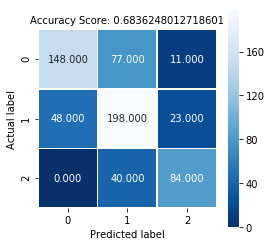

In [13]:
x_train, x_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=0)
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train,y_train)
y_predict=logisticRegr.predict(x_test)
score = logisticRegr.score(x_test, y_test)

predictions = logisticRegr.predict(x_test)
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 10);
